# Testing Generalized Linear Models on different datasets

In [2]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sf
import numpy as np
import numdifftools

In [3]:
# removing the limit on the number of columns
pd.set_option('display.max_columns', None)

# removing the restriction on the width of columns
pd.set_option('display.max_colwidth', None)

# ignore warnings
pd.set_option('chained_assignment', None)

 # limit on the number of decimal places
pd.options.display.float_format = '{:,.2f}'.format

# setting the chart style
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})
sns.set_context('notebook')  
sns.set_style("ticks")

## Binomial regression

- Name of distribution: Bernulli (binomial с 𝑛 = 1)

- Distribution of values - (0, 1)

- Parameters - 𝑝 (success probability), 𝑛 (number pf attempts)

- Link function - logit.

Let's use famous Titanic dataset.

In [4]:
titanic = pd.read_csv('titanik_full_data.csv', sep = '\t')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


From this whole set we will take only four columns:

- Survived - whether the passenger survived or not
- Sex - gender of the passenger
- Age - the age of the passenger
- Pclass - the class in which the passenger sailed (1, 2 or 3).

As binominal value we can use SURVIVED not SURVIVED VALUE. Let's look at the distribution of survivors/dead:

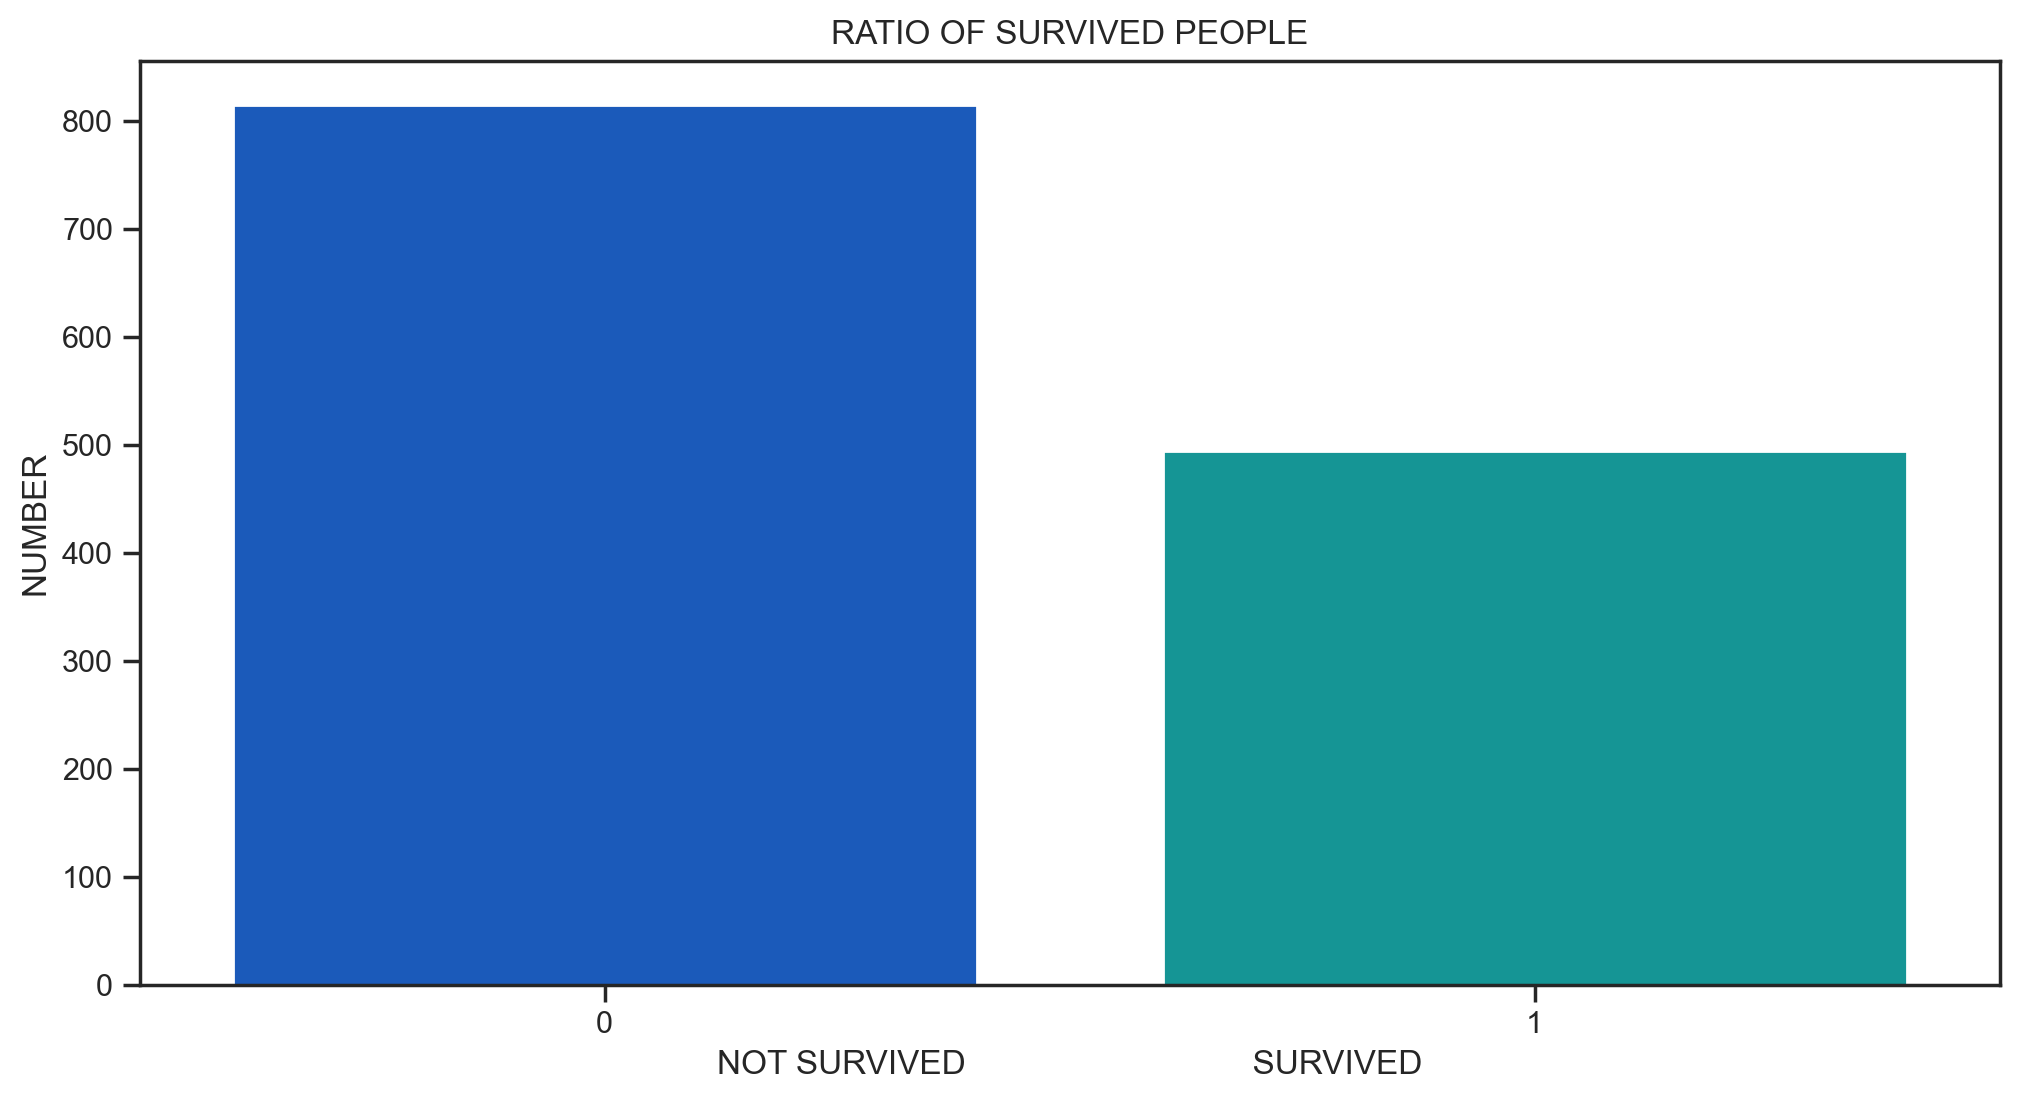

In [6]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x = 'Survived', data = titanic, palette='winter')

ax.set_title('RATIO OF SURVIVED PEOPLE')
ax.set_xlabel('NOT SURVIVED                               SURVIVED') 
ax.set_ylabel('NUMBER')
plt.show()

Let's apply logistic regression. Using C(), we specify categorical variables in the formula.

In [7]:
logit_res = sf.glm('Survived ~ C(Pclass) + C(Sex) + Age', titanic, family = sm.families.Binomial()).fit()

In [8]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Mon, 10 Jul 2023   Deviance:                       796.42
Time:                        23:17:02   Pearson chi2:                 1.10e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4421
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

- `Intercept` - the chances of survival (logarithmic) for a woman in the first class who is 0 years old.

- All coefficients are significant (`P>|z|` less than 0.05).

- The chances of survival in the second class are lower than in the first, and in the third even lower.

- Being a man on the Titanic is even worse.

- And it's also bad to be older on the Titanic.

## Multinomial regression

* Distribution name - multinomial,
* Values of distributions - (1...$n$),
* Parameters - $p_1$...$p_n$ (probability of each event), $n$ (number of attemts),
* Link function - multinomial logit.

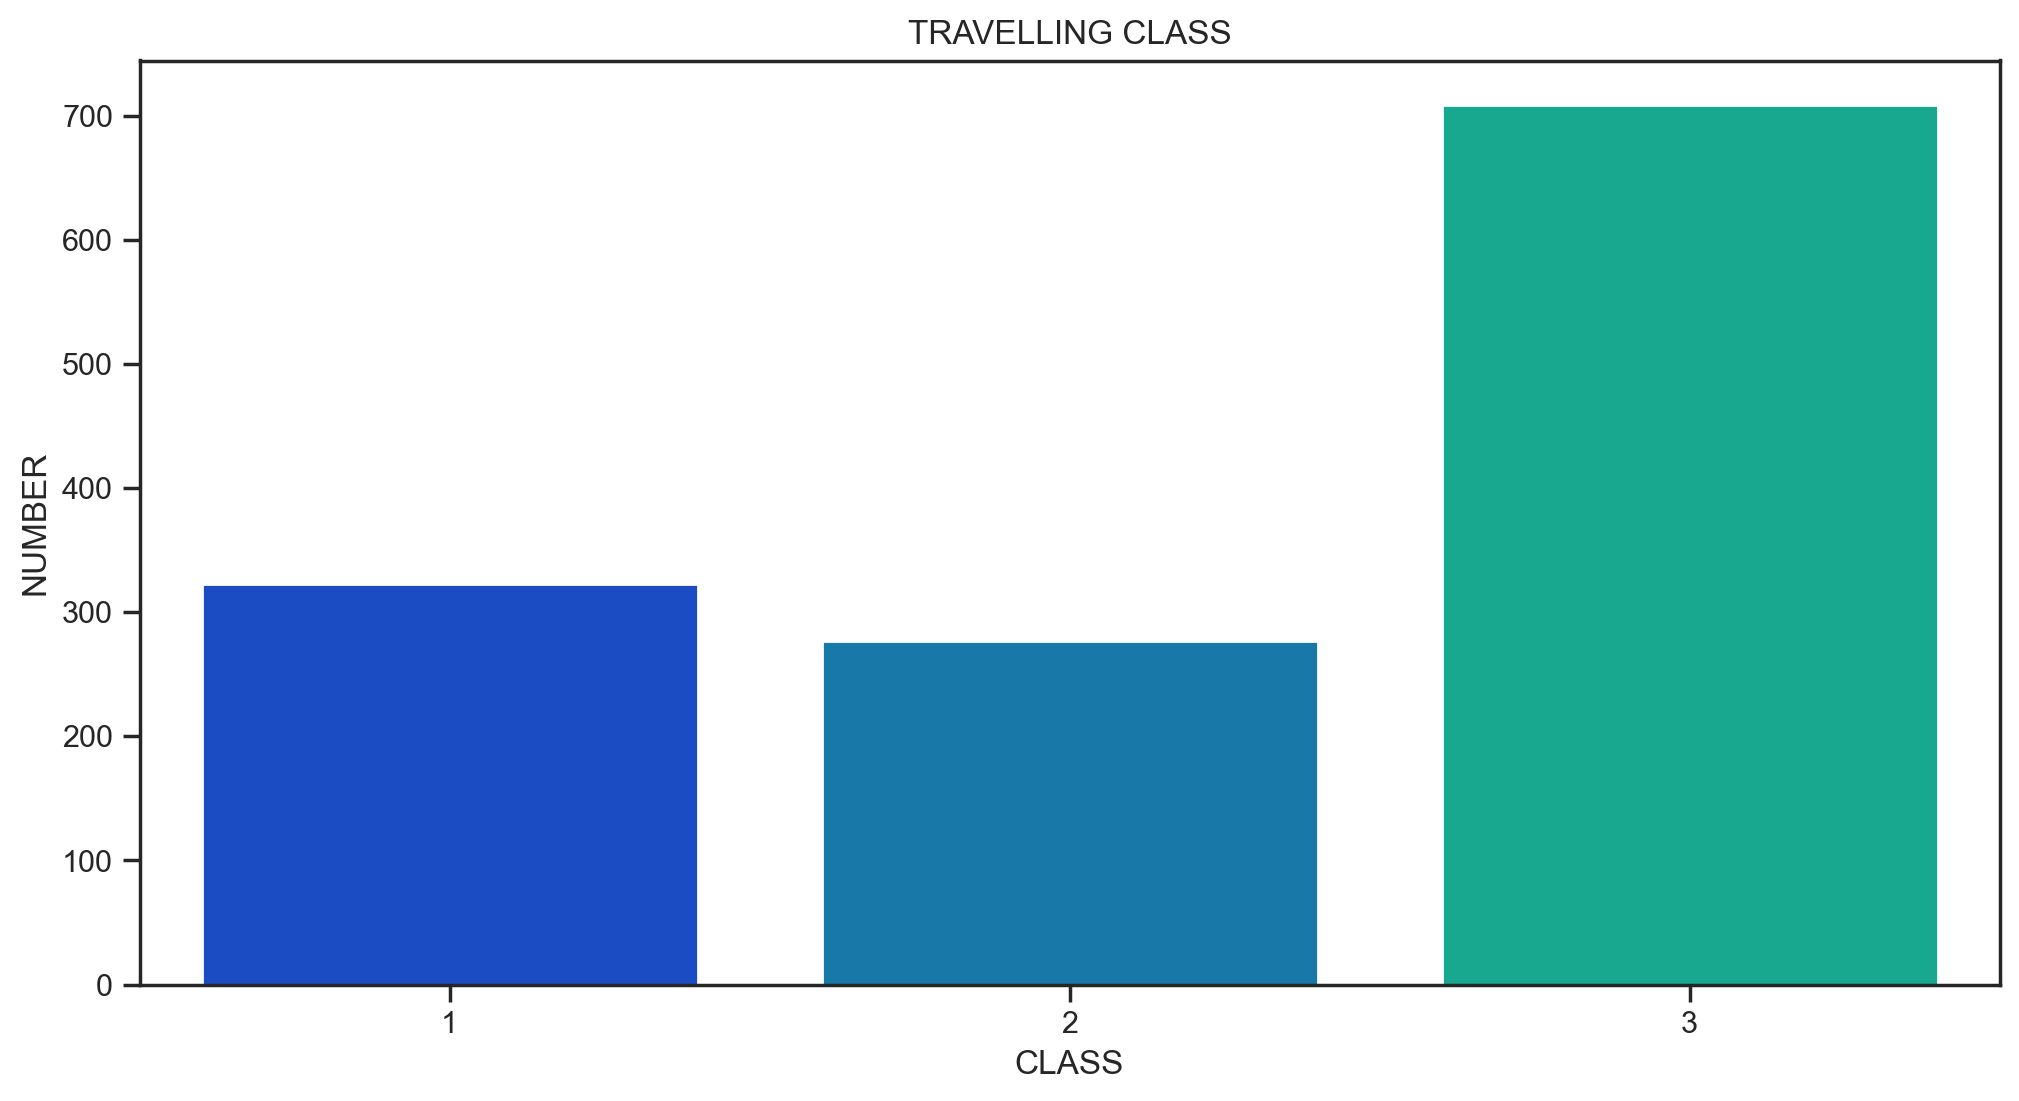

In [9]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x = 'Pclass', data = titanic, palette='winter')

ax.set_title('TRAVELLING CLASS')
ax.set_xlabel('CLASS') 
ax.set_ylabel('NUMBER')
plt.show()

Building model:

In [10]:
multi_res = sf.mnlogit('Pclass ~ C(Sex) + Age', titanic).fit()
multi_res.summary()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.1028
Time:                        23:17:02   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

In this case I interpret the result relative to the first class:

- There are more men in the second, and even more in the third.
- There are simply more people in other classes.
- Age has an inverse relationship with survival.

## Ordinal regression

* Distribution name - Cumulative threshold distribution;
* Values of distribution - (1...$n$);
* Parameters - $p_1$...$p_n$ (probability of each event);
* Link function - ordinal logit.

There is `bevel` package for ordinal regression, but it is not present in `pip`.  
It should be installed from [Github](https://github.com/Shopify/bevel) directly. There is instruction how to do it on [StackOverflow](https://stackoverflow.com/questions/15268953/how-to-install-python-package-from-github)

In [11]:
from bevel.linear_ordinal_regression import OrderedLogit

As example I take wine evaluation dataset with different chemical characteristics.

In [12]:
wines = pd.read_csv('winequality-red.csv', sep = ';')

In [13]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


Let's look at the distribution of ratings (variable `quality`):

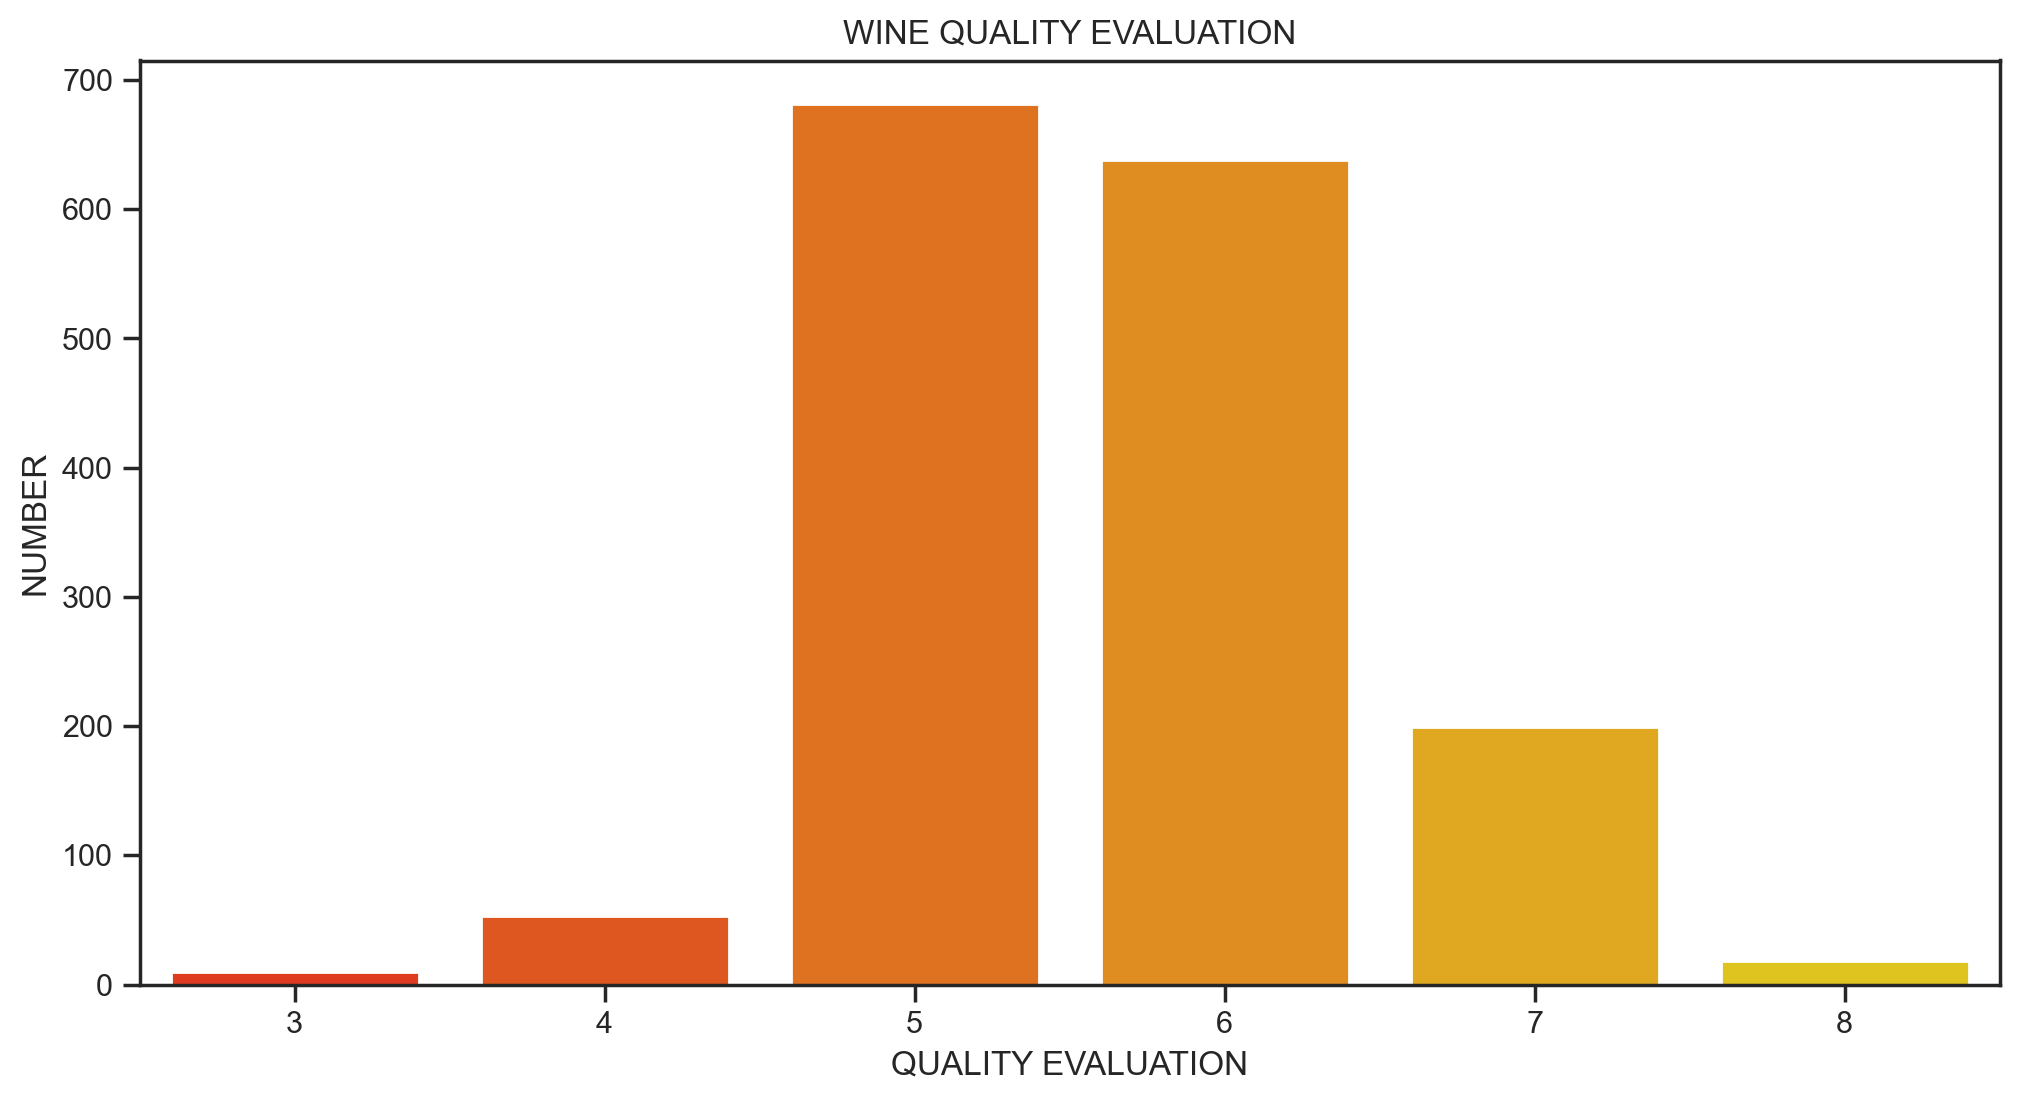

In [14]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x = 'quality', data = wines, palette='autumn')

ax.set_title('WINE QUALITY EVALUATION')
ax.set_xlabel('QUALITY EVALUATION') 
ax.set_ylabel('NUMBER')
plt.show()

In [15]:
#defining parameters for ordered regression model
Y = wines.quality
X = wines.drop('quality', axis = 1)

In [16]:
#creating model
ol = OrderedLogit()
ol.fit(X, Y)

In [17]:
ol.print_summary()

n=1599
                         beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                            
fixed acidity          0.1284    0.0823 0.1188     -0.0329      0.2898     
volatile acidity      -3.3957    0.4031 0.0000     -4.1857     -2.6058  ***
citric acid           -0.8022    0.4622 0.0827     -1.7081      0.1038    .
residual sugar         0.0878    0.0480 0.0670     -0.0062      0.1818    .
chlorides             -5.1416    1.3595 0.0002     -7.8062     -2.4770  ***
free sulfur dioxide    0.0137    0.0068 0.0444      0.0003      0.0270    *
total sulfur dioxide  -0.0111    0.0024 0.0000     -0.0158     -0.0065  ***
density              -76.5142   68.3657 0.2631   -210.5087     57.4802     
pH                    -0.8469    0.6009 0.1587     -2.0246      0.3309     
sulphates              2.9016    0.3675 0.0000      2.1814      3.6218  ***
alcohol                0.8308    0.0852 0.0000      0.6637      0.9978  ***
---
S

`Somers' D` is like $R^2$, but for ordinal regression model and changing from -1 to 1 (like correlation). 

Bad effect on rating based on ordinal regression model:

- volatile acidity
- chloride content
- total sulfur dioxide content

Good effect on rating ordinal regression model:

- free sulfur dioxide (here the significance could be disputed)
- the content of sulfates
- alcohol content

## Poisson Regression

* Distribution name - Poisson,
* Values of distribution - (0;$\infty$),
* Parameters - $\lambda$,
* Link function - logarithm.

I use free data of credit card users:

In [18]:
credit = pd.read_csv('credit_card.csv')

In [19]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.67,4.52,0.03,124.98,yes,no,3,54,1,12
1,yes,0,33.25,2.42,0.01,9.85,no,no,3,34,1,13
2,yes,0,33.67,4.50,0.00,15.00,yes,no,4,58,1,5
3,yes,0,30.50,2.54,0.07,137.87,no,no,0,25,1,7
4,yes,0,32.17,9.79,0.07,546.50,yes,no,2,64,1,5


We choose following :

- `active` - number of active accounts;
- `age` - age;
- `income` - annual income in tens of thousands;
- `expenditure` - monthly credit card expense;
- `owner` - does the customer own his own house or not;
- `selfemp` - self-employed or not;

Let's look at the distribution of the number of active accounts:

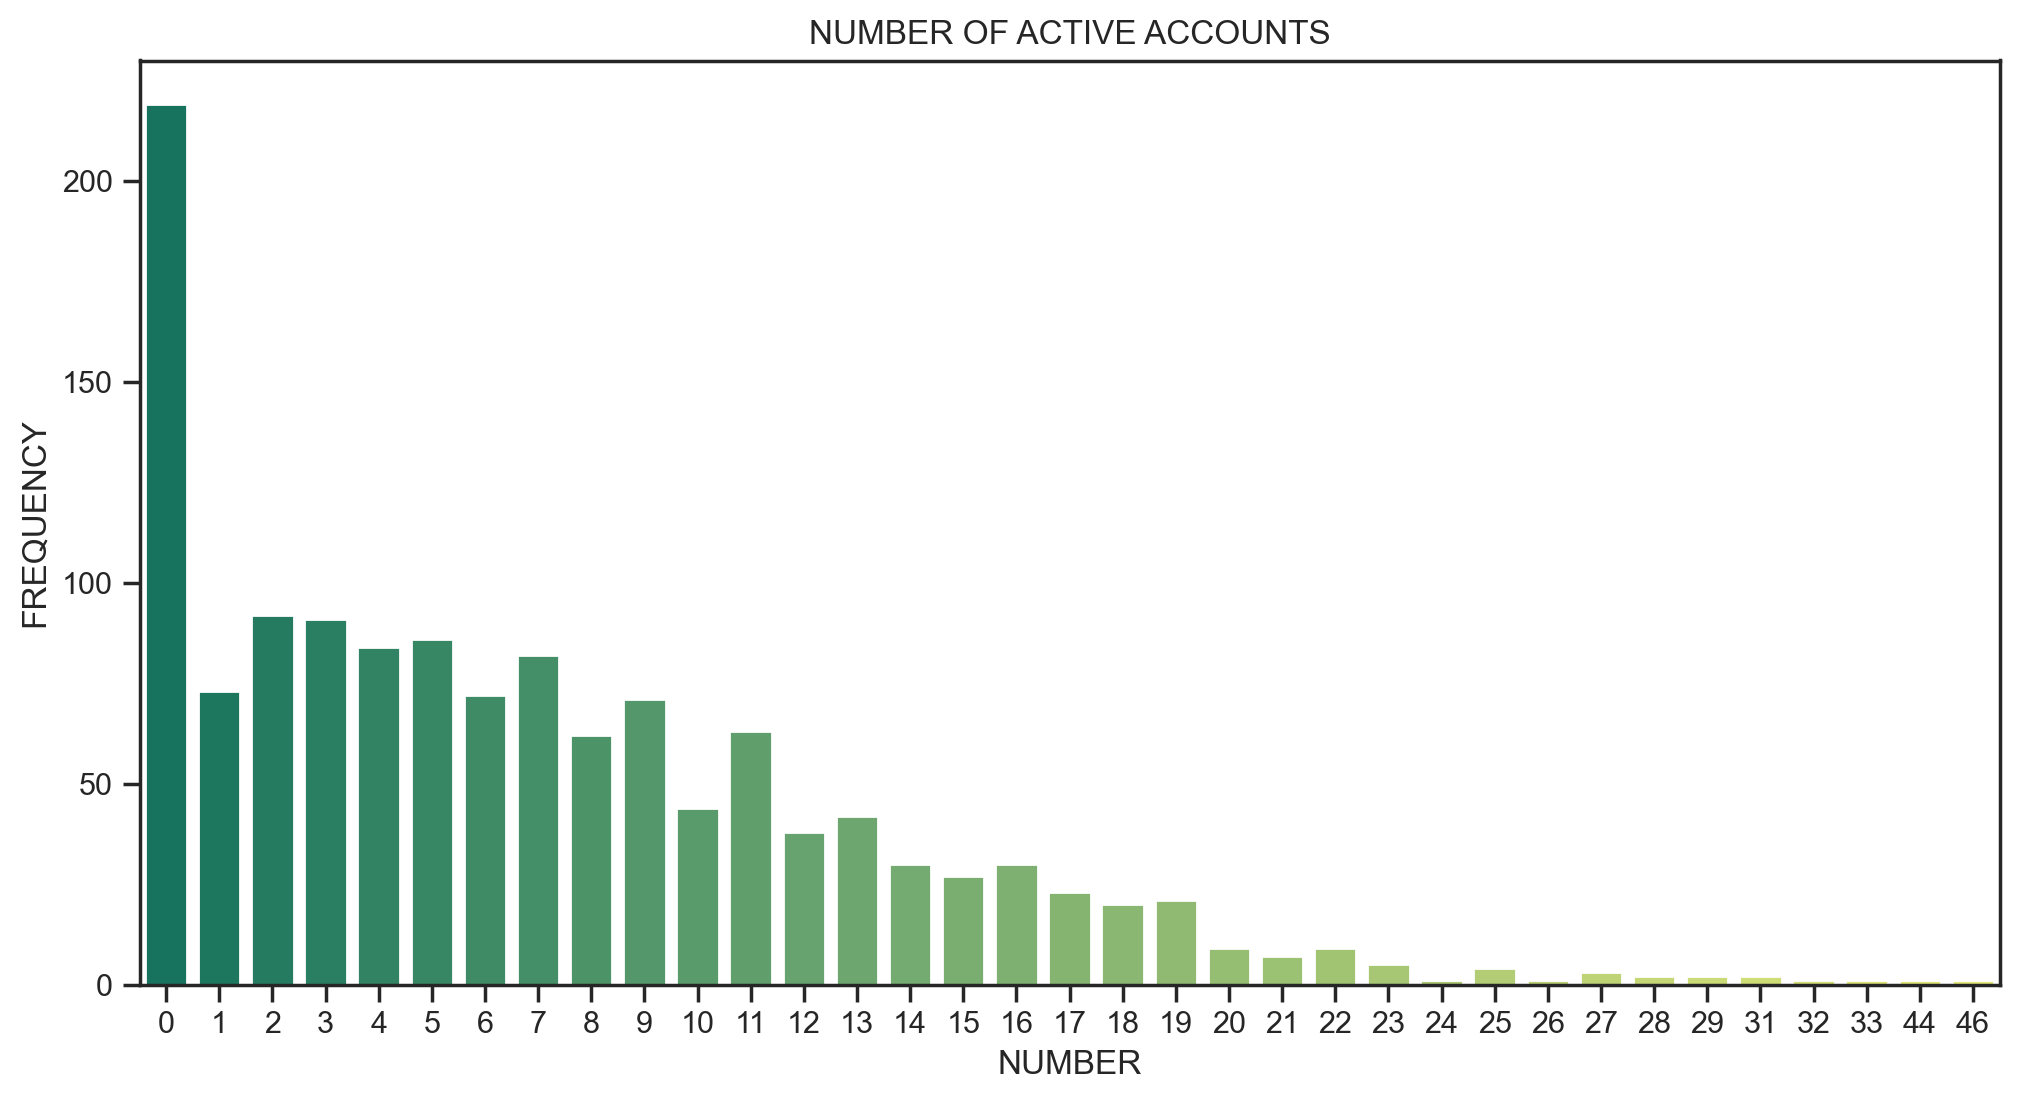

In [20]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x = 'active', data = credit, palette='summer')

ax.set_title('NUMBER OF ACTIVE ACCOUNTS')
ax.set_xlabel('NUMBER') 
ax.set_ylabel('FREQUENCY')
plt.show()

Creating Poisson model.

In [21]:
pois = sf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)', \
              family = sm.families.Poisson(), data = credit).fit()
pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5614.4
Date:                Mon, 10 Jul 2023   Deviance:                       7142.4
Time:                        23:17:03   Pearson chi2:                 6.89e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3903
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4000      0.037     37.440      0.000       1.327       1.473
C(owner)[T.yes]       0.4033      0.023     17.409      0.000       0.358       0.449
C(selfemp)[T.yes]     0.0141      0.040      0.355      0.723      -0.064       0.092
age                   0.0062      0.001      5.648      0.000       0.004       0.008
income                0.0361      0.006      5.752      0.000       0.024       0.048
expenditure        2.925e-05   3.75e-05      0.779      0.436   -4.43e-05       0.000
=====================================================================================
"""

The number of credit cards is growing depending on:

* income 
* age
* owning your own home

### Problems of overdispersion

How to calculate the overdispersion:

In [22]:
pois.pearson_chi2/pois.df_resid

5.249939996924281

For the Poisson distribution, this value should be close to 1. We need a different distribution that can compensate for the problem:

* Distribution name - negative binomial (Poisson+Gamma),
* Values of distribution - (0;$\infty$),
* Parameters - $\mu$ (average), $\theta$/$\alpha$ (form/dispersion),
* Link function - logarithm.

When building a model, pay attention to the argument `alpha` - this is the variance parameter. The convergence of the results depends on it, so in case of errors, it is recommended to set it in the range from 0.1 to 2.

In [23]:
neg = sf.glm('active ~ age + income + expenditure + C(owner) + C(selfemp)', data = credit, \
             family = sm.families.NegativeBinomial(alpha=0.15)).fit()
neg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4429.3
Date:                Mon, 10 Jul 2023   Deviance:                       3940.9
Time:                        23:17:03   Pearson chi2:                 3.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2157
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3690      0.054     25.206      0.000       1.263       1.475
C(owner)[T.yes]       0.3984      0.033     11.996      0.000       0.333       0.463
C(selfemp)[T.yes]     0.0055      0.059      0.094      0.925      -0.110       0.121
age                   0.0069      0.002      4.263      0.000       0.004       0.010
income                0.0393      0.010      4.099      0.000       0.021       0.058
expenditure        2.445e-05   5.63e-05      0.434      0.664   -8.59e-05       0.000
=====================================================================================
"""

The interpretation of the results is very similar. What about overdispersion?


In [24]:
neg.pearson_chi2/neg.df_resid

2.6196780724868987

Let's compare the models using the Akaike Information Criterion (AIC):

- Its absolute value does not mean anything, it is only useful for comparing models;
- The lower it is, the better is the model.

In [25]:
print(pois.aic)
print(neg.aic)

11240.817775454601
8870.632884339047


The predictive ability of the negative-binomial model is better.

### Zero inflated regression 

* Distribution name - Poisson/negative binomial + zero inflated,
* Values of distribution - (0;$\infty$),
* Parameters - same as Poisson and negative binominal + + $\pi$ (probability of zero belonging to one of the two processes),
* Link function - logarithm.

Here the API does not allow using the formula, so we will prepare the data:

In [26]:
credit.owner = np.where(credit.owner == 'yes', 1, 0)
credit.selfemp = np.where(credit.selfemp == 'yes', 1, 0) #changing values to 1 and 0 to avoid mistakes

Y = credit.active 
X = credit.loc[:, ['owner', 'selfemp', 'age', 'income', 'expenditure']]
X = sm.add_constant(X) # adding a constant so that there is an intercept in the model

The more complex are the models, the more unstable  they are. We increase the number of iterations and change the algorithm to a more stable one:

In [27]:
zeroinf = sm.ZeroInflatedPoisson(Y, X).fit(maxiter = 100, method = 'ncg')
zeroinf.summary()

Optimization terminated successfully.
         Current function value: 3.899929
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 4


/Users/evgeniyakiseleva/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                  active   No. Observations:                 1319
Model:             ZeroInflatedPoisson   Df Residuals:                     1313
Method:                            MLE   Df Model:                            5
Date:                 Mon, 10 Jul 2023   Pseudo R-squ.:                -0.05893
Time:                         23:17:03   Log-Likelihood:                -5144.0
converged:                        True   LL-Null:                       -4857.8
Covariance Type:             nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     0.0999      0.055      1.812      0.070      -0.008       0.208
const             1.7967      0.037     48.172      0.000       1.724       1.870
owner             0.0017      0.023      0.073      0.942      -0.043       0.046
selfemp           0.0008      0.039      0.022      0.983      -0.075       0.077
age               0.0093      0.001      8.656      0.000       0.007       0.011
income            0.0019      0.007      0.280      0.779      -0.011       0.015
expenditure       0.0001   3.81e-05      2.691      0.007    2.79e-05       0.000
=================================================================================
"""

The interpretation has changed dramatically: only age is significant and expenses have become significant. The `inflate` coefficient has also appeared - this is the coefficient responsible for compensating for extra zeros.

Let's compare the models:

In [28]:
print(pois.aic)
print(neg.aic)
print(zeroinf.aic)

11240.817775454601
8870.632884339047
10300.013032904442


And doing the same with the negative binomial model:

In [29]:
zeroinf_2 = sm.ZeroInflatedNegativeBinomialP(Y, X).fit(maxiter = 100, method = 'ncg')
zeroinf_2.summary()

Optimization terminated successfully.
         Current function value: 3.055914
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                            active   No. Observations:                 1319
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     1313
Method:                                      MLE   Df Model:                            5
Date:                           Mon, 10 Jul 2023   Pseudo R-squ.:                -0.03018
Time:                                   23:17:04   Log-Likelihood:                -4030.7
converged:                                  True   LL-Null:                       -3912.7
Covariance Type:                       nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.5152      0.058     -8.820      0.000      -0.630      -0.401
const             1.4543      0.087     16.765      0.000       1.284       1.624
owner             0.3590      0.050      7.112      0.000       0.260       0.458
selfemp           0.0029      0.090      0.032      0.974      -0.173       0.178
age               0.0097      0.003      3.757      0.000       0.005       0.015
income            0.0352      0.016      2.234      0.026       0.004       0.066
expenditure    5.109e-05   9.08e-05      0.563      0.573      -0.000       0.000
alpha             0.4517      0.032     14.330      0.000       0.390       0.514
=================================================================================
"""

And here the interpretation is similar to the original one. There is also the `alpha` parameter, which evaluates the excess variance.

Let's compare all the models:

In [30]:
print(pois.aic)
print(neg.aic)
print(zeroinf.aic)
print(zeroinf_2.aic)

11240.817775454601
8870.632884339047
10300.013032904442
8073.499844948839


Zero-inflated negative binomial model is better than others. And for predictive analytics better use this model. But only for decriptive analytics Poisson model was enough.

##  Logistic regression for churn prediction/ Models of the time before the event/ Survival models/ Accelerated failure time models

Clients withdraw from companies they use in some period of time. 

- We have 2 values :if client withrawn or not and we have time before the action.
- We can't define the time before action if it is not happened yet.
- We cant' exlude them from the model.

* Distribution name - Weibull distribution,
* Values of distribution - (0;$\infty$),
* Parameters - $\alpha$ (dispersion), $\gamma$ (form)
* Link function - logarithm.

The event will definitely happen and with the help of coefficients we can estimate whether the time of the approach of this event is accelerating or slowing down.

In [31]:
# pip istall lifelines

In [32]:
import lifelines as lf

I will test special lifelines package  on customer churn data:

In [33]:
churn = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

In [34]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


I limit the number of columns that I analyze:

In [35]:
churn = churn.loc[:, ['Churn', 'tenure', 'SeniorCitizen', 'Dependents', 'MonthlyCharges', 'PaperlessBilling']]

In [36]:
churn.head()

,Churn,tenure,SeniorCitizen,Dependents,MonthlyCharges,PaperlessBilling
0,No,1,0,No,29.85,Yes
1,No,34,0,No,56.95,No
2,Yes,2,0,No,53.85,Yes
3,No,45,0,No,42.30,No
4,Yes,2,0,No,70.70,Yes


- **Churn** - has the client left or not
- **tenure** - how many months has client been with the company
- **SeniorCitizen** - is the client elderly or not
- **Dependents** - are there dependents in the family or not
- **MonthlyCharges** - how much the client pays per month
- **PaperlessBilling** - payment by check or checkless

Churn distribution:

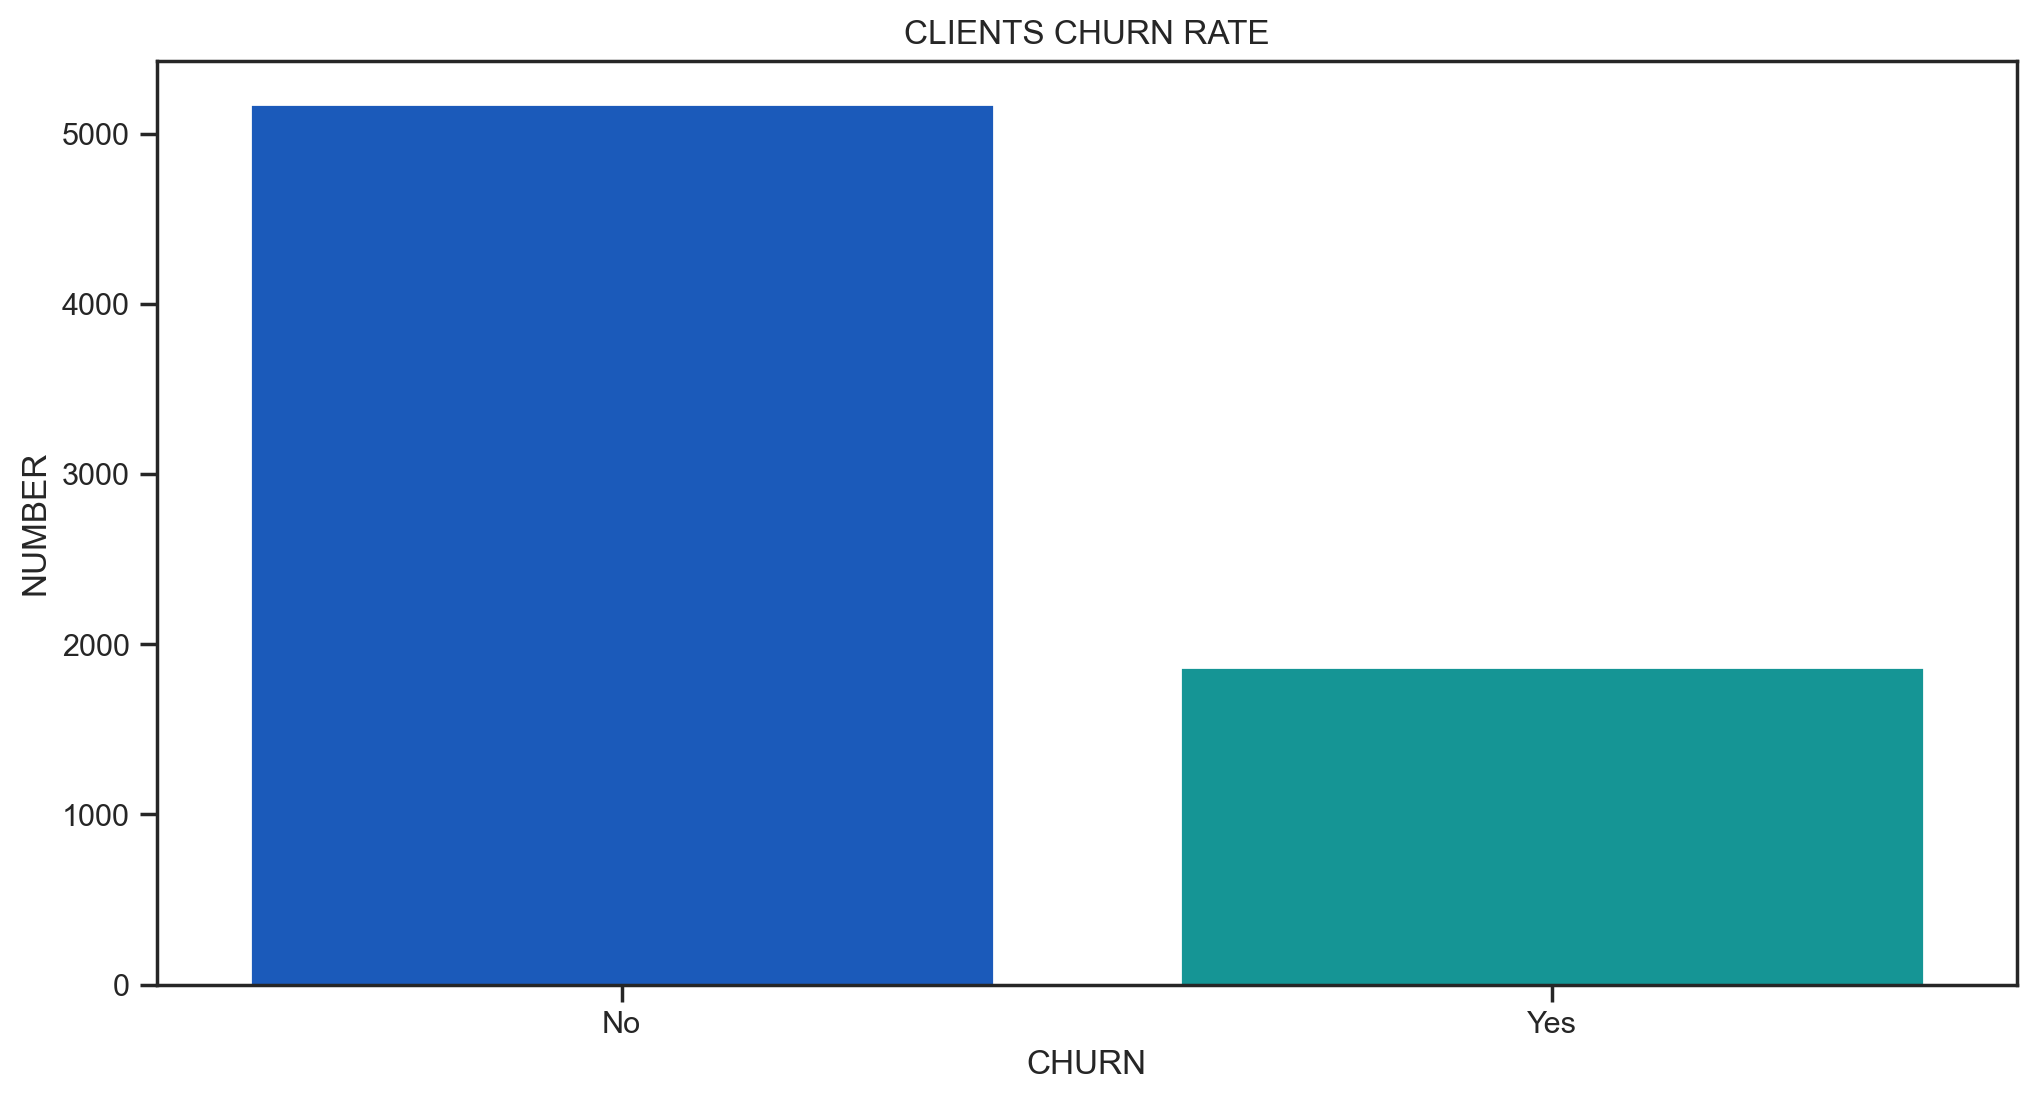

In [37]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x = 'Churn', data = churn, palette='winter')

ax.set_title('CLIENTS CHURN RATE')
ax.set_xlabel('CHURN') 
ax.set_ylabel('NUMBER')
plt.show()

How much time clients spend with company:

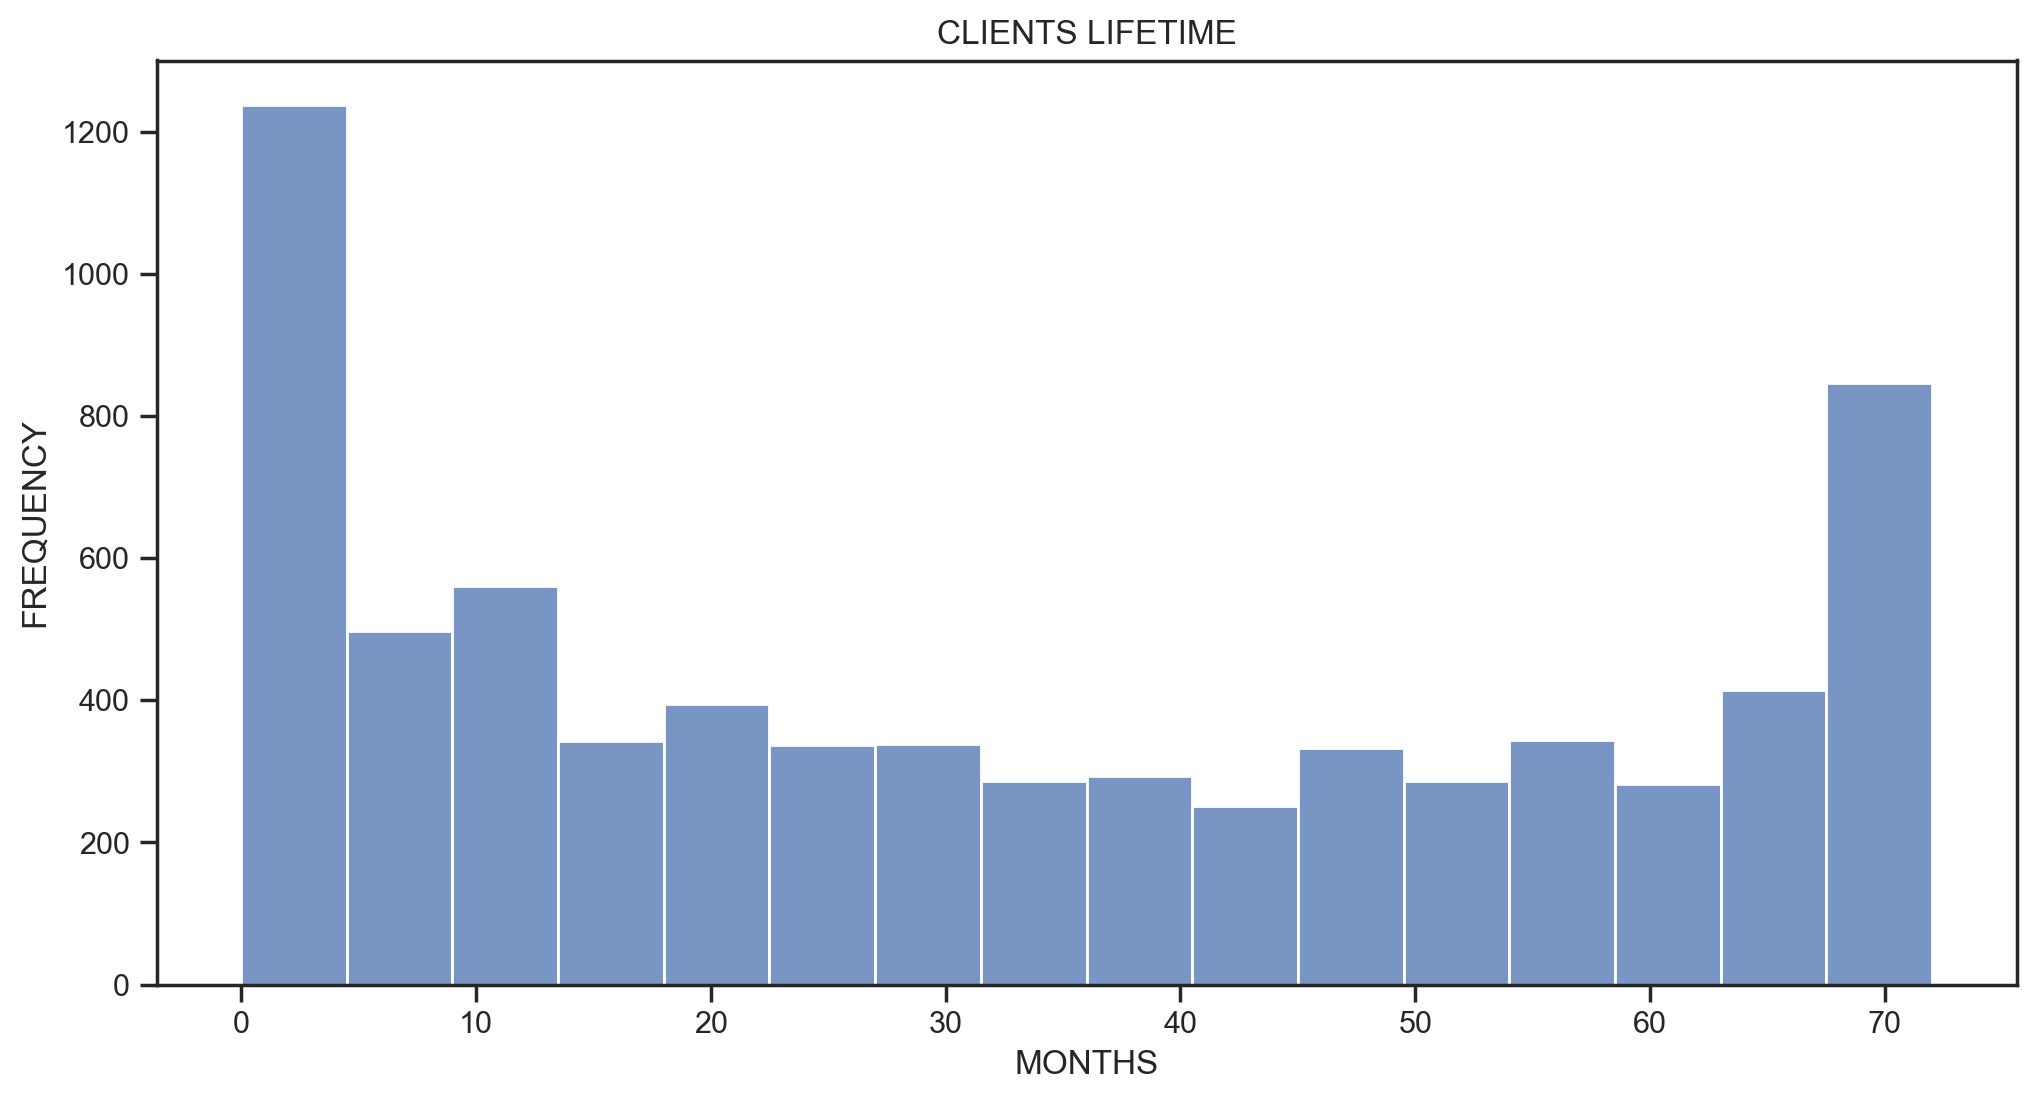

In [41]:
plt.figure(figsize=(12, 6))
ax=sns.histplot(churn['tenure'], kde = False)

ax.set_title('CLIENTS LIFETIME')
ax.set_xlabel('MONTHS') 
ax.set_ylabel('FREQUENCY')
plt.show()

Preparing data:

In [42]:
churn.tenure = churn.tenure + 0.001 # for excluding 0 months
churn.Churn = np.where(churn.Churn == 'Yes', 1, 0) # transforming to numbers
churn.SeniorCitizen = np.where(churn.SeniorCitizen == 1, 'Yes', 'No') #backwards

Building a model. It needs columns with data, a column with time, a column with an event, and optionally a formula.

In [43]:
surv = lf.WeibullAFTFitter()

surv.fit(df = churn, duration_col = 'tenure', event_col = 'Churn', \
         formula = 'C(SeniorCitizen) + C(Dependents) + MonthlyCharges + C(PaperlessBilling)')

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [44]:
surv.print_summary()

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1869
           log-likelihood = -10355.96
         time fit was run = 2023-07-10 20:46:24 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                          
lambda_ Intercept                    5.84     344.19       0.12             5.61             6.08               272.31               435.03
        C(SeniorCitizen)[T.Yes]     -0.38       0.69       0.09            -0.54            -0.21                 0.58                 0.81
        C(Dependents)[T.Yes]         1.21       3.34       0.10             1.02             1.40                 2.76                 4.05
        MonthlyCharges              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        C(PaperlessBilling)[T.Yes]  -0.91       0.40       0.09            -1.08            -0.74                 0.34                 0.48
rho_    Intercept                   -0.43       0.65       0.02            -0.47            -0.39                 0.63                 0.68

                                     cmp to      z      p   -log2(p)
param   covariate                                                   
lambda_ Intercept                      0.00  48.88 <0.005        inf
        C(SeniorCitizen)[T.Yes]        0.00  -4.44 <0.005      16.75
        C(Dependents)[T.Yes]           0.00  12.38 <0.005     114.48
        MonthlyCharges                 0.00  -0.85   0.39       1.35
        C(PaperlessBilling)[T.Yes]     0.00 -10.31 <0.005      80.37
rho_    Intercept                      0.00 -20.70 <0.005     313.93
---
Concordance = 0.62
AIC = 20723.91
log-likelihood ratio test = 441.19 on 4 df
-log2(p) of ll-ratio test = 310.46

If the coefficient is less than zero, the time to the event is shorter. If the coefficient is greater than zero, the time to the event is further.

Interpretation:

- Older people use the service less time,
- Those who have a checkless payment - even less,
- People with dependents use it more than usual.